In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [3]:
def load_data():
    X = np.load("X.npy")
    y = np.load("y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

In [4]:
# load dataset
X, y = load_data()

In [ ]:
print ('The first element of X is: ', X[0])

In [6]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


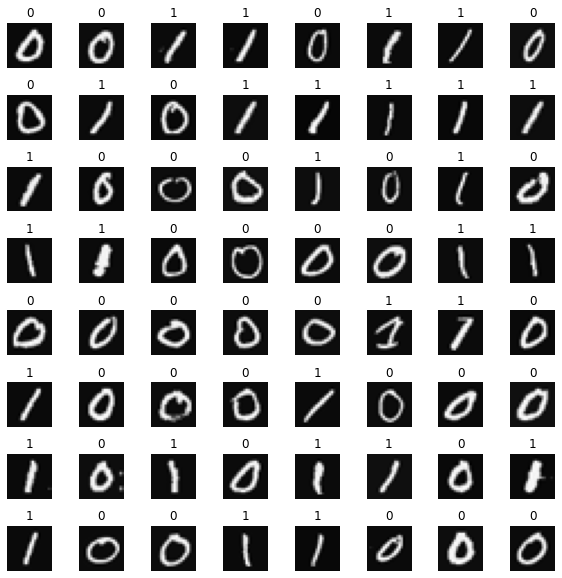

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [8]:

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size
        ### START CODE HERE ### 
        Dense(25, activation='sigmoid', name = 'layer1'),
        Dense(15, activation='sigmoid', name = 'layer2'),        
        Dense(1, activation='sigmoid', name = 'layer3')  
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)  

2023-04-18 09:05:36.279223: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [9]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [10]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


In [11]:
[layer1, layer2, layer3] = model.layers

In [12]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [13]:
print(model.layers[2].weights)

[<tf.Variable 'layer3/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.07658029],
       [ 0.43830746],
       [ 0.02261698],
       [-0.26618254],
       [ 0.18875766],
       [ 0.1991716 ],
       [-0.41216016],
       [ 0.28094208],
       [-0.4125973 ],
       [ 0.16202062],
       [ 0.5119025 ],
       [ 0.3221349 ],
       [ 0.23515356],
       [-0.24607676],
       [ 0.36676085]], dtype=float32)>, <tf.Variable 'layer3/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [14]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 2s 4ms/step - loss: 0.6708
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.5318
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.3953
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2799
Epoch 5/20
32/32 [==============================] - 0s 4ms/step - loss: 0.2046
Epoch 6/20
32/32 [==============================] - 0s 4ms/step - loss: 0.1569
Epoch 7/20
32/32 [==============================] - 0s 7ms/step - loss: 0.1255
Epoch 8/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1036
Epoch 9/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0877
Epoch 10/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0755
Epoch 11/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0660
Epoch 12/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0584
Epoch 13/20
32/32 [==============================

In [15]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 165ms/step
 predicting a zero: [[0.03426635]]
1/1 [==============================] - 0s 32ms/step
 predicting a one:  [[0.9874115]]


In [16]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


1/1 [==============================] - 0s 33ms/step


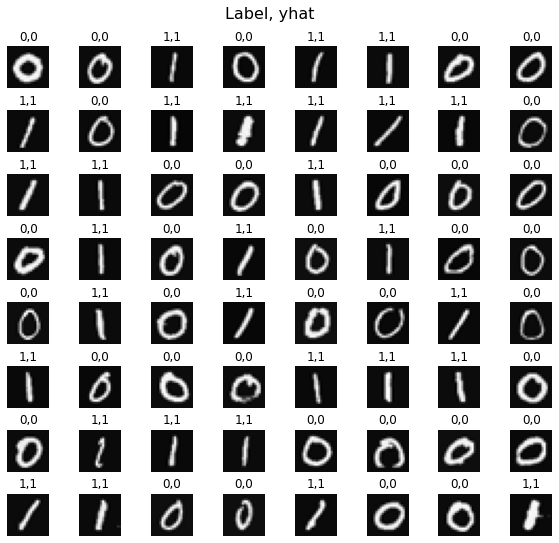

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()